In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import warnings




In [3]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df['average'] = (df['math score'] + df['reading score'] + df['writing score'])/3

In [7]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [8]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['average'])
y = df['average']

In [9]:
from sklearn.compose import ColumnTransformer

onehot = OneHotEncoder()
scaler = StandardScaler()

cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

preprocessor = ColumnTransformer(
    [
        ('onehotencoder',onehot,cat_features),
        ('stnscaler',scaler,num_features),
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [12]:
X.shape

(1000, 20)

array([[ 1.        ,  0.        ,  0.        , ...,  0.39002351,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.19207553,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.57771141,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.46775108,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.12609287,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  0.71993682,
         1.15336989,  1.18158627]])

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [16]:
def evalute(actual,predicted):
    mae = mean_absolute_error(actual,predicted)
    mse = mean_squared_error(actual,predicted)
    r2 = r2_score(actual,predicted)

    return mae,mse,r2

In [18]:
models = {
    'Linear Regression' : LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'K-Neighbors Regressor' : KNeighborsRegressor(),
    'DecisionTreeRegressor' : DecisionTreeRegressor(),
    'AdaBoost Regressor' : AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    train_mae , train_mse , train_r2 = evalute(y_train,y_train_pred)
    test_mae, test_mse , test_r2 = evalute(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Performace for training data")
    print(f"Mean Absolute Error : {train_mae}")
    print(f"Mean Squared Error : {train_mse}")
    print(f"R2 Score : {train_r2}")

    print('----------------------------------------------------')

    print("Performance for test data")
    print(f"Mean Absolute Error : {test_mae}")
    print(f"Mean Squared Error : {test_mse}")
    print(f"R2 Score : {test_r2}")
    r2_list.append(test_r2)
     
    
    print('='*25)
    print('\n')

Linear Regression
Performace for training data
Mean Absolute Error : 8.554934538551606e-15
Mean Squared Error : 1.2460215770146926e-28
R2 Score : 1.0
----------------------------------------------------
Performance for test data
Mean Absolute Error : 9.492850949754939e-15
Mean Squared Error : 1.4176777099907846e-28
R2 Score : 1.0


Lasso
Performace for training data
Mean Absolute Error : 0.8628551382932824
Mean Squared Error : 1.157254284553633
R2 Score : 0.9940613845928857
----------------------------------------------------
Performance for test data
Mean Absolute Error : 0.9069119090516006
Mean Squared Error : 1.3501787659805935
R2 Score : 0.9939650271654107


Ridge
Performace for training data
Mean Absolute Error : 0.006969341632369264
Mean Squared Error : 7.424788491197034e-05
R2 Score : 0.9999996189863894
----------------------------------------------------
Performance for test data
Mean Absolute Error : 0.007391798954432318
Mean Squared Error : 9.144185886735303e-05
R2 Score : 0.

In [19]:
results = pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2 Score']).sort_values(by=['R2 Score'],ascending=False)

In [20]:
results

,Model Name,R2 Score
0,Linear Regression,1.000000
2,Ridge,1.000000
1,Lasso,0.993965
3,Random Forest Regressor,0.993564
5,DecisionTreeRegressor,0.988140
6,AdaBoost Regressor,0.972854
4,K-Neighbors Regressor,0.956667


## Linear Regression

In [21]:
regg = LinearRegression(fit_intercept=True)
regg = regg.fit(X_train,y_train)
predictions = regg.predict(X_test)
score = r2_score(y_test,predictions)*100
print(f"Accuracy of the model is : {score}")

Accuracy of the model is : 100.0


Text(0, 0.5, 'predicted')

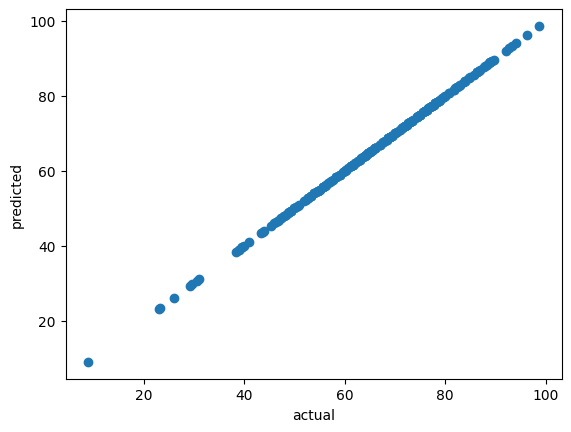

In [22]:
plt.scatter(y_test,predictions)
plt.xlabel('actual')
plt.ylabel('predicted')

<Axes: xlabel='average'>

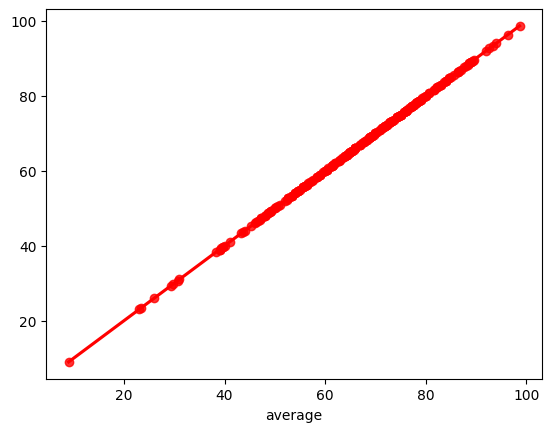

In [24]:
sns.regplot(x=y_test,y=predictions,ci=None,color='red')